# Homework 1

Varshini Yanamandra

In this homework, you will be working with the Lahman baseball statistics database. This database contains pitching, hitting, and fielding statistics for Major League Baseball from 1871 through 2016.  It includes data from the two current leagues (American and National), the four other "major" leagues (American Association, Union Association, Players League, and Federal League), and the National Association of 1871-1875. 

You will be working with the sqlite version of the Lahman database, which is avaiable at https://github.com/jknecht/baseball-archive-sqlite . Download the <b>2016</b> database file. You will be using some of the tables in this database for this homework.  

For documentation about the data and its tables, see http://www.seanlahman.com/files/database/readme2017.txt . Note that the documentation is for a dataset that includes the 2017 data, but most of it applies to the 2016 dataset. One difference is that the <i><b>People</i></b> table is named <i><b>Master</i></b> in the 2016 dataset. 

You need to use SQL queries and the code framework in the file SQLite.ipynb (sqlite3, pandas, matplotlib, seaborn) for this homework. 

<b>IMPORTANT</b>

Your submission should be an ipynb file named in the following format: <i><b>FirstTwoLettersOfFirstnameLastname.ipynb</i></b> . A student named John Doe will have a submission named JoDoe.ipynb . You can use this assignment description file and rename it by selecting <b>File</b> and then <b>Rename</b>.

You must use Python code to provide your solutions. Insert your code for each part in cells right after the description. Use the + on the top tab to insert cells. You can use the button labeled with the scissors to delete a cell. You can also change a cell from code to Markdown (such as this one) to insert comments and descriptions. 

## SQL Setup

In [1]:
import sqlite3

In [2]:
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
# creating a connection
connection = sqlite3.connect("./lahman2016.sqlite")
# create a cursor instance
cursor = connection.cursor()

## Part I (10 points)

(i) Display the names of the tables in the database.

(ii) Display the names of the columns in the table Master. 

(iii) Display the number of rows in the table Master.

(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 

In [4]:
# part (i)
# printing the names of the tables in the database
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('AllstarFull',)
('Appearances',)
('AwardsManagers',)
('AwardsPlayers',)
('AwardsShareManagers',)
('AwardsSharePlayers',)
('Batting',)
('BattingPost',)
('CollegePlaying',)
('Fielding',)
('FieldingOF',)
('FieldingOFsplit',)
('FieldingPost',)
('HallOfFame',)
('HomeGames',)
('Managers',)
('ManagersHalf',)
('Master',)
('Parks',)
('Pitching',)
('PitchingPost',)
('Salaries',)
('Schools',)
('SeriesPost',)
('Teams',)
('TeamsFranchises',)
('TeamsHalf',)


In [5]:
# another way to do the same thing
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
rows = cursor.fetchall()
for row in rows:
    print(row)

('AllstarFull',)
('Appearances',)
('AwardsManagers',)
('AwardsPlayers',)
('AwardsShareManagers',)
('AwardsSharePlayers',)
('Batting',)
('BattingPost',)
('CollegePlaying',)
('Fielding',)
('FieldingOF',)
('FieldingOFsplit',)
('FieldingPost',)
('HallOfFame',)
('HomeGames',)
('Managers',)
('ManagersHalf',)
('Master',)
('Parks',)
('Pitching',)
('PitchingPost',)
('Salaries',)
('Schools',)
('SeriesPost',)
('Teams',)
('TeamsFranchises',)
('TeamsHalf',)


In [6]:
# part (ii)
# defining a function to get column names
def column_names(table_name):
    cursor.execute("SELECT * FROM " + table_name)
    colnames = cursor.description
    for row in colnames:
        print(row[0])
        
column_names("Master")

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


In [7]:
# another way to do the same thing
cursor.execute("SELECT * FROM Master;")
colnames = cursor.description
for row in colnames:
    print(row[0])

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


In [8]:
# part (iii)
import pandas as pd

master_table = pd.read_sql_query("SELECT * FROM Master;", connection) # using pandas to visualize the table
master_table.shape[0] # printing the number of rows in table 'Master'

19105

In [9]:
# another way to do the same thing
cursor.execute("SELECT COUNT(*) FROM Master;")
op = cursor.fetchall()
for count in op:
    print(count[0])

19105


In [10]:
# part (iv)
cursor.execute("SELECT nameFirst, nameLast FROM Master M WHERE weight > 280;")
cursor.fetchall()

[('Jumbo', 'Brown'),
 ('Jonathan', 'Broxton'),
 ('Bartolo', 'Colon'),
 ('Adam', 'Dunn'),
 ('Jeff', 'Niemann'),
 ('Chad', 'Paronto'),
 ('Calvin', 'Pickering'),
 ('Jon', 'Rauch'),
 ('Tyler', 'Robertson'),
 ('CC', 'Sabathia'),
 ('Kennys', 'Vargas'),
 ('Dmitri', 'Young'),
 ('Walter', 'Young')]

## Part II (20 points)

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame. 

(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 


(iii) Do the same as in (i), but now only include groups with an average height > 70. 

(iv) Plot the results as in Part (ii)

In [11]:
# part (i)
master_by_birthyear = pd.read_sql_query("SELECT birthYear, avg(height), count(*) FROM Master GROUP BY birthYear ORDER BY birthYear;", connection)
master_by_birthyear

,birthYear,avg(height),count(*)
0,NaN,69.416667,132
1,1820.0,NaN,1
2,1824.0,NaN,1
3,1831.0,NaN,1
4,1832.0,NaN,2
...,...,...,...
162,1992.0,73.663636,110
163,1993.0,73.803571,56
164,1994.0,73.838710,31
165,1995.0,74.500000,6


In [12]:
# verifying some findings in the table seen above
cursor.execute("SELECT count(*) FROM Master WHERE birthYear IS NULL")
year_is_none = cursor.fetchall()[0][0]
year_is_none

132

In [13]:
# verifying some findings in the table seen above
cursor.execute("SELECT COUNT(DISTINCT birthYear) from Master")
cursor.fetchall()[0][0]

166

In [14]:
# verifying some findings in the table seen above
height_is_none_years = pd.read_sql_query("SELECT birthYear FROM Master WHERE height IS NULL AND birthYear IS NOT NULL ORDER BY birthYear", connection)
height_is_none_years.head()

,birthYear
0,1820
1,1824
2,1831
3,1832
4,1832


<AxesSubplot:xlabel='birthYear', ylabel='avg(height)'>

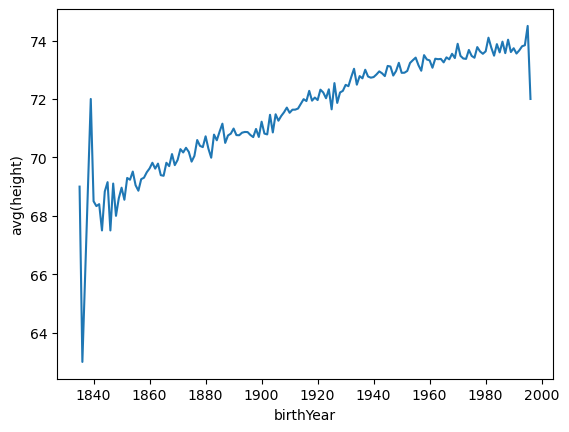

In [15]:
# part (ii)
import seaborn
%matplotlib inline
seaborn.lineplot(x = "birthYear", y = "avg(height)", data = master_by_birthyear)

In [16]:
# part (iii)
avg70 = pd.read_sql_query("SELECT birthYear, avg(height), count(*) FROM Master GROUP BY birthYear HAVING avg(height) >70 ORDER BY birthYear;", connection)
avg70

,birthYear,avg(height),count(*)
0,1839,72.000000,1
1,1868,70.114286,90
2,1871,70.283019,64
3,1872,70.169492,71
4,1873,70.329114,86
...,...,...,...
121,1992,73.663636,110
122,1993,73.803571,56
123,1994,73.838710,31
124,1995,74.500000,6


<AxesSubplot:xlabel='birthYear', ylabel='avg(height)'>

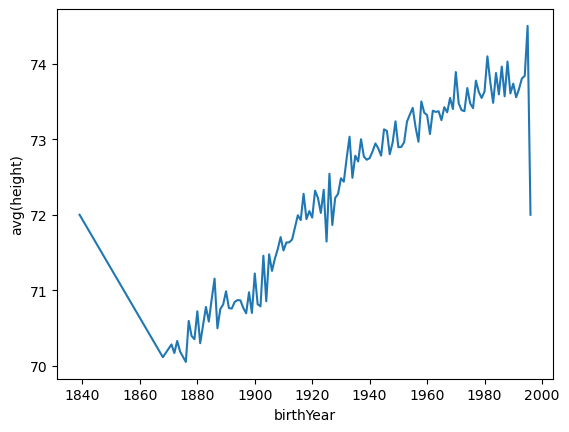

In [17]:
# part (iv)
seaborn.lineplot(x = "birthYear", y = "avg(height)", data = avg70)

## Part III (20 points)

(i) Find the namefirst, namelast, playerid and yearid of all people who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

(ii) Display the first 10 rows of the dataframe in (i). 

(iii) Display the total number of rows of the dataframe in (i).


(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

In [18]:
# part (i)
column_names("HallOfFame") # getting the names of the columns in the 'HallOfFame' table

playerID
yearid
votedBy
ballots
needed
votes
inducted
category
needed_note


In [19]:
HOF_table = pd.read_sql_query("SELECT M.nameFirst, M.nameLast, M.playerID, H.yearid from Master M, HallOfFame H WHERE M.playerID = H.playerID AND H.inducted == 'Y' ORDER BY H.yearid DESC", connection)
HOF_table

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
...,...,...,...,...
312,Ty,Cobb,cobbty01,1936
313,Walter,Johnson,johnswa01,1936
314,Christy,Mathewson,mathech01,1936
315,Babe,Ruth,ruthba01,1936


In [20]:
# part (ii)
HOF_table.head(10)

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
5,Ken,Griffey,griffke02,2016
6,Mike,Piazza,piazzmi01,2016
7,Craig,Biggio,biggicr01,2015
8,Randy,Johnson,johnsra05,2015
9,Pedro,Martinez,martipe02,2015


In [21]:
# part (iii)
HOF_table.shape[0]

317

In [22]:
# part (iv)
column_names("Schools")

schoolID
name_full
city
state
country


In [23]:
cursor.execute("SELECT DISTINCT(state) FROM Schools ORDER BY state")
rows = cursor.fetchall()
for i in range(5):
    print(rows[i][0])
# we see from here that states are abbreviated; California is 'CA'

AL
AR
AZ
CA
CO


In [24]:
column_names("CollegePlaying")

playerID
schoolID
yearID


In [25]:
hof_ca_schools = pd.read_sql_query("SELECT M.nameFirst, M.nameLast, M.playerID, S.name_full, H.yearid \
                                    FROM Master M, HallOfFame H, Schools S, CollegePlaying C \
                                    WHERE C.playerID = H.playerID AND M.playerID = H.playerID \
                                            AND S.state = 'CA' AND S.schoolID = C.schoolID AND H.inducted == 'Y'\
                                    ORDER BY H.yearID DESC, S.name_full ASC", connection)
hof_ca_schools

,nameFirst,nameLast,playerID,name_full,yearid
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Randy,Johnson,johnsra05,University of Southern California,2015
2,Randy,Johnson,johnsra05,University of Southern California,2015
3,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
4,Pat,Gillick,gillipa99,University of Southern California,2011
5,Pat,Gillick,gillipa99,University of Southern California,2011
6,Doug,Harvey,harvedo99,San Diego State University,2010
7,Doug,Harvey,harvedo99,San Diego State University,2010
8,Dick,Williams,willidi02,Pasadena City College,2008
9,Tony,Gwynn,gwynnto01,San Diego State University,2007


## Part IV (20 points)

Find the namefirst, namelast, playerid, yearid, and single-year slg (Slugging Percentage) of the players and save the results in a dataframe. For statistical significance, only include players with more than 50 at-bats in the season. Order the results by slg descending. 

Display the players with the 10 best annual Slugging Percentage recorded over all time. 

Slugging Percentage is not provided in the database. It can be computed using a formula given at https://en.wikipedia.org/wiki/Slugging_percentage and the data in the database. Note that there is one term in the formula that is not directly available as a column in the database. You will have to compute it using some of the columns. 

Also, you have to compute slg as a floating point number, so make sure to use SQL in a way to get this. 

In [26]:
column_names("Batting")

playerID
yearID
stint
teamID
lgID
G
G_batting
AB
R
H
2B
3B
HR
RBI
SB
CS
BB
SO
IBB
HBP
SH
SF
GIDP
G_old


In [27]:
# H = 1B + 2B + 3B + HR
# SLG = (1B + (2 * 2B) + (3 * 3B) + (4 * HR))/AB
# SLG = (H + 2B + (2 * 3B) + (3 * HR))/AB
slg_stats = pd.read_sql_query("SELECT M.nameFirst, M.nameLast, P.yearID, P.playerID, \
                                (P.H + P.[2B] + (2 * P.[3B]) + (3 * P.HR))/CAST(P.AB AS DOUBLE PRECISION) as slg \
                                FROM Master M, Batting P \
                                WHERE M.playerID = P.playerID  AND P.AB > 50 \
                                ORDER BY slg DESC", connection)
slg_stats.head()

,nameFirst,nameLast,yearID,playerID,slg
0,Shane,Spencer,1998,spencsh01,0.910448
1,Ted,Williams,1953,willite01,0.901099
2,Barry,Bonds,2001,bondsba01,0.863445
3,Babe,Ruth,1920,ruthba01,0.849015
4,Babe,Ruth,1921,ruthba01,0.846296


In [28]:
# displaying the players with the top 10 annual-slugging percentages recorded of all time
slg_stats.head(10)

,nameFirst,nameLast,yearID,playerID,slg
0,Shane,Spencer,1998,spencsh01,0.910448
1,Ted,Williams,1953,willite01,0.901099
2,Barry,Bonds,2001,bondsba01,0.863445
3,Babe,Ruth,1920,ruthba01,0.849015
4,Babe,Ruth,1921,ruthba01,0.846296
5,Jeff,Baker,2006,bakerje03,0.824561
6,Marlon,Anderson,2006,anderma02,0.812500
7,Barry,Bonds,2004,bondsba01,0.812332
8,Barry,Bonds,2002,bondsba01,0.799007
9,Babe,Ruth,1927,ruthba01,0.772222


In [29]:
# another way to do it - using INNER JOIN
slg_stats2 = pd.read_sql_query("SELECT M.nameFirst, M.nameLast, S.yearID, S.playerID, S.slg FROM Master M JOIN \
                                (SELECT yearID, playerID, (H + [2B] + (2 * [3B]) + (3 * HR))/CAST(AB AS DOUBLE PRECISION) AS slg \
                                FROM Batting WHERE AB > 50) S \
                                ON S.playerID = M.playerID \
                                ORDER BY S.slg DESC", connection)
slg_stats2.head(10)

,nameFirst,nameLast,yearID,playerID,slg
0,Shane,Spencer,1998,spencsh01,0.910448
1,Ted,Williams,1953,willite01,0.901099
2,Barry,Bonds,2001,bondsba01,0.863445
3,Babe,Ruth,1920,ruthba01,0.849015
4,Babe,Ruth,1921,ruthba01,0.846296
5,Jeff,Baker,2006,bakerje03,0.824561
6,Marlon,Anderson,2006,anderma02,0.812500
7,Barry,Bonds,2004,bondsba01,0.812332
8,Barry,Bonds,2002,bondsba01,0.799007
9,Babe,Ruth,1927,ruthba01,0.772222


## Part V (20 points)

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it. 

(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

In [30]:
column_names("Salaries")

yearID
teamID
lgID
playerID
salary


In [31]:
# part (i)
salary = pd.read_sql_query("SELECT yearID, MIN(salary), MAX(salary), avg(salary) \
                            FROM Salaries \
                            GROUP BY yearID \
                            ORDER BY yearID", connection)
salary

,yearID,MIN(salary),MAX(salary),avg(salary)
0,1985,60000.0,2130300.0,4.762994e+05
1,1986,60000.0,2800000.0,4.171470e+05
2,1987,62500.0,2127333.0,4.347295e+05
3,1988,62500.0,2340000.0,4.531711e+05
4,1989,62500.0,2766667.0,5.063231e+05
5,1990,100000.0,3200000.0,5.119737e+05
6,1991,100000.0,3800000.0,8.949612e+05
7,1992,109000.0,6100000.0,1.047521e+06
8,1993,0.0,6200000.0,9.769666e+05
9,1994,50000.0,6300000.0,1.049589e+06


array([[<AxesSubplot:title={'center':'s'}>]], dtype=object)

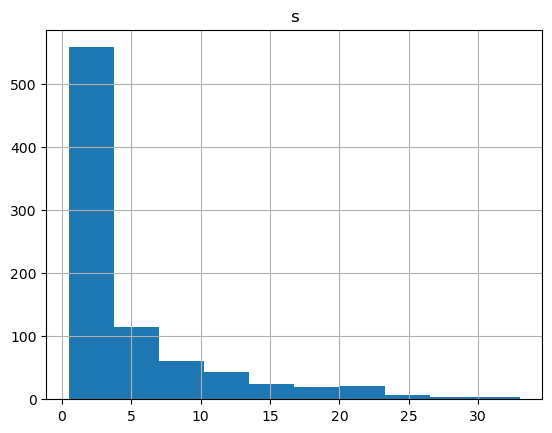

In [32]:
# part (ii)
salary_2016_in_millions = pd.read_sql_query("SELECT CAST(salary AS DOUBLE PRECISION)/1000000 as s FROM Salaries \
                                 WHERE yearID = '2016'", connection)
salary_2016_in_millions.hist(bins = 10)

## Part VI (10 points)

Extract and display a facet of the dataset that you think is interesting. This should not be a facet from Parts I-V. 

In [33]:
column_names("AwardsManagers")

playerID
awardID
yearID
lgID
tie
notes


In [34]:
column_names("AwardsPlayers")

playerID
awardID
yearID
lgID
tie
notes


In [35]:
# checking how many times both a player and their manager have won awards in the same year
awards = pd.read_sql_query("SELECT * \
                            FROM AwardsPlayers P INNER JOIN AwardsManagers M \
                            ON P.yearID = M.yearID AND P.playerID = M.playerID", connection)
awards

# surprisingly, the answer is 0 (never)!

,playerID,awardID,yearID,lgID,tie,notes,playerID,awardID,yearID,lgID,tie,notes


In [36]:
# extra
column_names("Pitching")

playerID
yearID
stint
teamID
lgID
W
L
G
GS
CG
SHO
SV
IPouts
H
ER
HR
BB
SO
BAOpp
ERA
IBB
WP
HBP
BK
BFP
GF
R
SH
SF
GIDP


In [37]:
pitches = pd.read_sql_query("SELECT S.playerID, avg(((P.W + P.L) * 1000000)/CAST(S.salary AS DOUBLE PRECISION)) as R \
                             FROM Pitching P, Salaries S \
                             WHERE P.playerID = S.playerID\
                             GROUP BY S.playerID \
                             ORDER BY R DESC", connection)
pitches

,playerID,R
0,perazos01,173.419355
1,moonebi01,150.000000
2,carltst01,144.802148
3,strakle01,134.408602
4,youmafl01,134.249284
...,...,...
2817,arencjp01,0.000000
2818,amarial01,0.000000
2819,alvarrj01,0.000000
2820,alexama02,0.000000


This simple query shows us that there is no direct relation between the total number of games a player has played and the average salary they make.